<a href="https://colab.research.google.com/github/Sanusingh3107/Advertising_Using_Linear_Regression/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
!pip install wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data_dir="/content/drive/My Drive/Dataset/Movie Genre Classification"
train_path=data_dir+"/train_data.txt"
test_path=data_dir+"/test_data.txt"

In [ ]:
train_data=pd.read_csv(train_path,sep=":::",names=["ID","Title","Genre","Description"],engine="python")
test_data=pd.read_csv(test_path,sep=":::",names=["ID","Title","Description"],engine="python")

In [ ]:
train_data.head()

ID                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...

In [ ]:
test_data.head()

ID                          Title  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                         Description  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Genre        54200 non-null  object
 3   Description  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

In [ ]:
train_data.isna().sum()

ID             0
Title          0
Genre          0
Description    0
dtype: int64

In [ ]:
test_data.isna().sum()

ID             0
Title          0
Description    0
dtype: int64

In [ ]:
print(train_data.shape)
print(test_data.shape)

(54200, 4)
(54200, 3)


In [ ]:
train_data.Genre.value_counts()

Genre
 drama           13611
 documentary     13093
 comedy           7445
 short            5072
 horror           2203
 thriller         1591
 action           1315
 western          1031
 reality-tv        884
 family            783
 adventure         775
 music             730
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           322
 mystery           319
 musical           277
 biography         265
 history           242
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

In [ ]:
stopwords_set=set(stopwords.words("english"))

In [ ]:
def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)

    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)

    # tokenize and convert to list
    tokens = word_tokenize(text)

    ## Lemmatize it
    lemmatizer  = WordNetLemmatizer()

    ## lemmatize each token
   # text = [lemmatizer.lemmatize(token) for token in tokens]
    text = text.split()

    text = [word for word in text if word not in stopwords_set]


    return " ".join(text)

In [ ]:
train_data["Description"]=train_data["Description"].apply(preprocessing)

In [ ]:
train_data['Description']

0        listening conversation doctor parents 10yearol...
1        brother sister past incestuous relationship cu...
2        bus empties students field trip museum natural...
3        help unemployed father make ends meet edith tw...
4        films title refers unrecovered bodies ground z...
                               ...                        
54195    concept essay documentary 16 participants ages...
54196    vulture canyon juvenile girls prison arizona f...
54197    alex young woman aged 18 lives mother arad sma...
54198    ahmet nurudin dervish head islamic monastery m...
54199    follow life stephen young man starting college...
Name: Description, Length: 54200, dtype: object

Text(0.5, 1.0, 'Distribution of Genres')

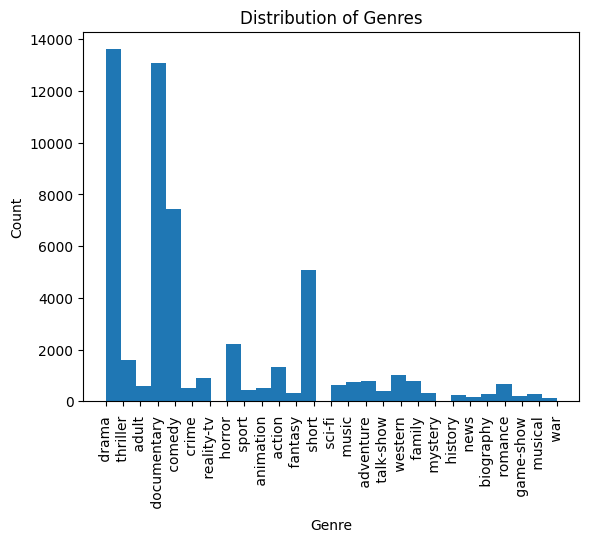

In [ ]:
plt.hist(train_data['Genre'],bins=30)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres')

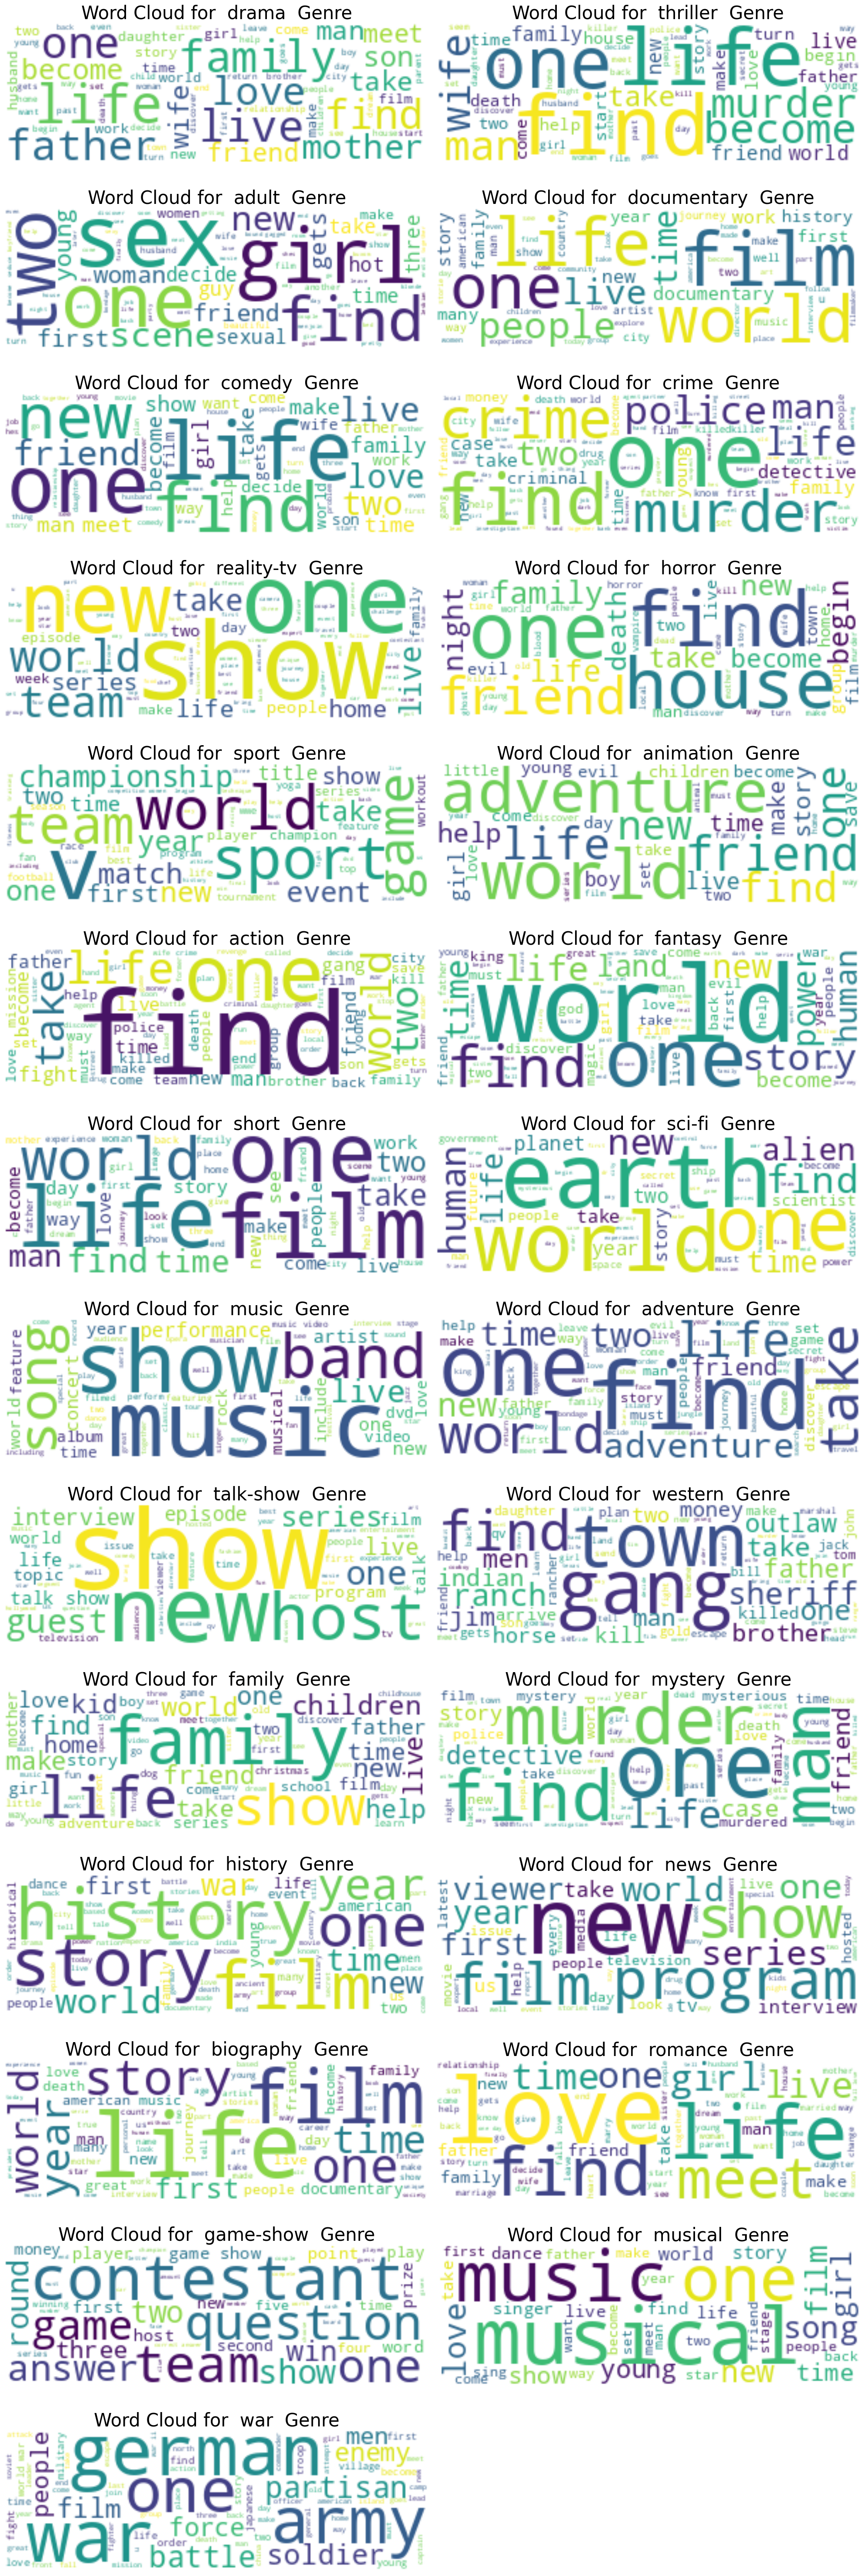

In [ ]:
genres = train_data['Genre'].unique()
plt.figure(figsize=(20, 60))

# Iterate over each genre
for i, genre in enumerate(genres, 1):
    plt.subplot(14, 2, i)  # Assuming you have 14 rows and 2 columns for 28 genres
    text_subset = " ".join(list(train_data[train_data["Genre"] == genre]['Description']))
    wordcloud = WordCloud(max_words=300, width=300, height=100, background_color='white').generate(text_subset)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre} Genre',fontsize=30)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
train_data=train_data.drop(["ID","Title"],axis=1)
train_data.head()

Genre                                        Description
0      drama   listening conversation doctor parents 10yearol...
1   thriller   brother sister past incestuous relationship cu...
2      adult   bus empties students field trip museum natural...
3      drama   help unemployed father make ends meet edith tw...
4      drama   films title refers unrecovered bodies ground z...

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_data["Genre_enc"]=label_encoder.fit_transform(train_data["Genre"])
class_names=list(label_encoder.classes_)
class_names

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [ ]:
train_data.head()

Genre                                        Description  Genre_enc
0      drama   listening conversation doctor parents 10yearol...          8
1   thriller   brother sister past incestuous relationship cu...         24
2      adult   bus empties students field trip museum natural...          1
3      drama   help unemployed father make ends meet edith tw...          8
4      drama   films title refers unrecovered bodies ground z...          8

In [ ]:
x_train=train_data["Description"]
y_train=train_data["Genre"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.25,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40650, 2)
(13550, 2)
(40650,)
(13550,)


In [ ]:
vectorizer=CountVectorizer()
x_train1=vectorizer.fit_transform(x_train)
x_test2=vectorizer.transform(x_test)

In [ ]:
vectorize=TfidfVectorizer()
x_train_vec=vectorizer.fit_transform(x_train)
x_test_vec=vectorizer.transform(x_test)

In [ ]:

model1=LogisticRegression()
model1.fit(x_train_vec,y_train)
print("Model Score on Training Data :",model1.score(x_train_vec,y_train))
print("Model Score on Testing Data :",model1.score(x_test_vec,y_test))

y_pred=model1.predict(x_test_vec)
print(classification_report(y_pred, y_test))

ValueError: Found input variables with inconsistent numbers of samples: [2, 40650]

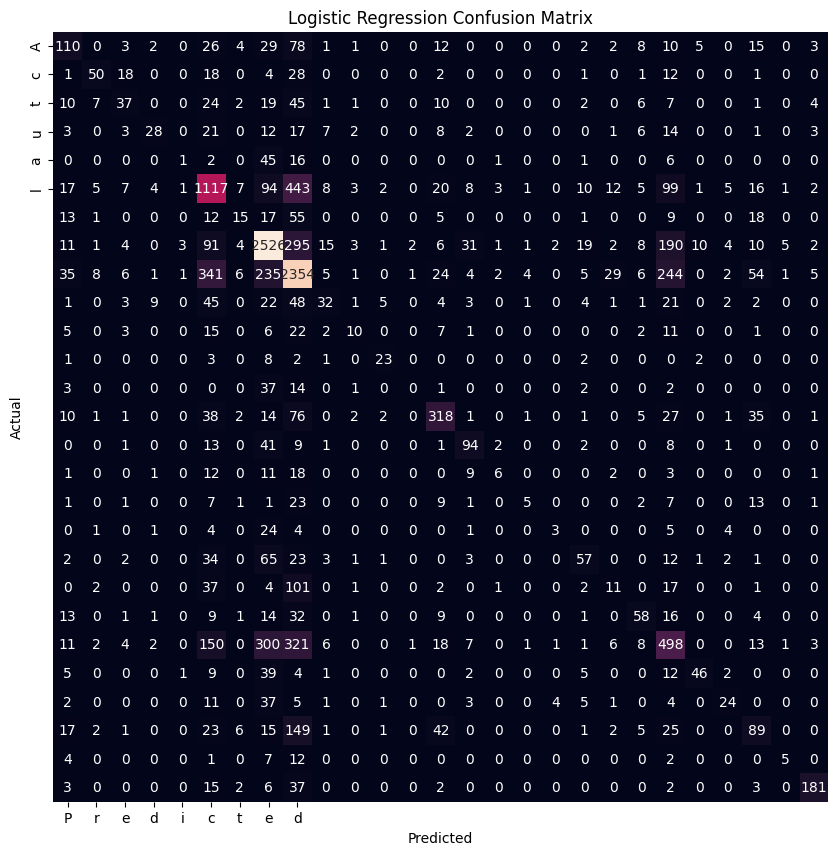

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt="d",cbar=False,xticklabels='Predicted',yticklabels='Actual')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [ ]:
svm=LinearSVC()
svm.fit(x_train_vec,y_train)
print("Model Score on Training Data :",svm.score(x_train_vec,y_train))
print("Model Score on Testing Data :",svm.score(x_test_vec,y_test))

y_pred=svm.predict(x_test_vec)
print(classification_report(y_pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Score on Training Data : 0.9995817958179581
Model Score on Testing Data : 0.5219188191881918
               precision    recall  f1-score   support

      action        0.29      0.31      0.30       295
       adult        0.35      0.55      0.43        87
   adventure        0.22      0.25      0.23       151
   animation        0.20      0.34      0.25        73
   biography        0.01      0.03      0.02        38
      comedy        0.55      0.50      0.52      2056
       crime        0.08      0.14      0.10        80
 documentary        0.72      0.68      0.70      3455
       drama        0.62      0.55      0.58      3845
      family        0.17      0.29      0.21       121
     fantasy        0.09      0.15      0.12        54
   game-show        0.57      0.67      0.62        36
     history        0.02      0.03      0.02        29
      horror        0.55      0.55      0.55       538
       music        0.55      0.54      0.54       177
     musical        

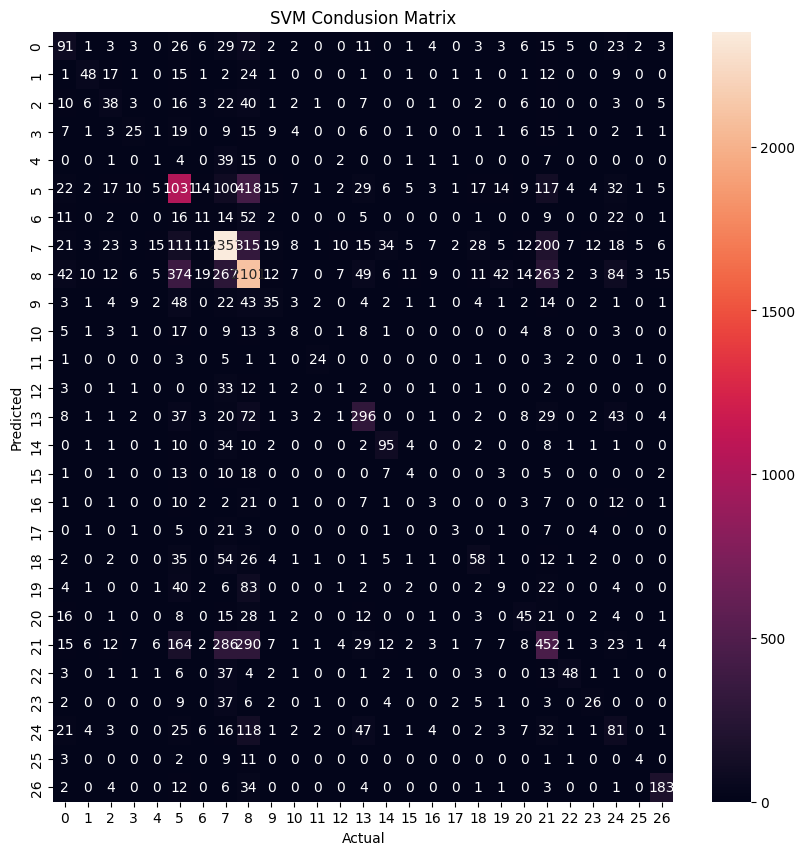

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d',)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM Condusion Matrix')
plt.show()

In [ ]:
import joblib

In [ ]:
test_data["Description"]=test_data["Description"].apply(preprocessing)

In [ ]:
x_test1=test_data["Description"]
y_test1=train_data["Genre"]

In [ ]:
print(x_test1.shape)
print(y_test1.shape)

(54200,)
(54200,)


In [ ]:
x_test1_vec=vectorizer.transform(x_test1)

In [ ]:
y_pred1=model1.predict(x_test1_vec)
print("Model Score on Unknown score :",model1.score(x_test1_vec,y_test1))
print(classification_report(y_pred1, y_test1))

Model Score on Unknown score : 0.18167896678966788
               precision    recall  f1-score   support

      action        0.02      0.03      0.03      1075
       adult        0.01      0.01      0.01       346
   adventure        0.01      0.01      0.01       405
   animation        0.01      0.02      0.01       160
   biography        0.00      0.00      0.00        26
      comedy        0.16      0.14      0.15      8144
       crime        0.00      0.00      0.00       169
 documentary        0.28      0.25      0.26     14793
       drama        0.32      0.26      0.28     17010
      family        0.00      0.01      0.00       321
     fantasy        0.01      0.02      0.01       112
   game-show        0.01      0.01      0.01       139
     history        0.00      0.00      0.00        38
      horror        0.04      0.04      0.04      2010
       music        0.01      0.01      0.01       594
     musical        0.00      0.01      0.01        80
     mystery 

In [ ]:
y_pred2=svm.predict(x_test1_vec)
print("Model Score on Unknown score :",svm.score(x_test1_vec,y_test1))
print(classification_report(y_pred2, y_test1))

Model Score on Unknown score : 0.1703690036900369
               precision    recall  f1-score   support

      action        0.02      0.02      0.02      1258
       adult        0.01      0.01      0.01       443
   adventure        0.01      0.02      0.02       537
   animation        0.01      0.01      0.01       282
   biography        0.00      0.00      0.00       127
      comedy        0.15      0.14      0.15      7924
       crime        0.00      0.00      0.00       312
 documentary        0.26      0.24      0.25     14029
       drama        0.29      0.25      0.27     15313
      family        0.01      0.01      0.01       492
     fantasy        0.01      0.01      0.01       201
   game-show        0.01      0.01      0.01       179
     history        0.00      0.01      0.01        92
      horror        0.04      0.04      0.04      2168
       music        0.01      0.01      0.01       646
     musical        0.00      0.00      0.00       149
     mystery  